In [77]:
# Import required libraries
import pandas as pd                    # for handling tabular data (CSV files)
import numpy as np                     # for numerical operations
import matplotlib.pyplot as plt        # for plotting graphs
import tensorflow as tf                # deep learning library
from tensorflow import keras           # high-level API for building neural networks
from tensorflow.keras import layers    # used to add layers in the neural network
from sklearn.model_selection import train_test_split   # for splitting dataset into train and test
from sklearn.preprocessing import StandardScaler       # for scaling (standardizing) features

In [99]:
# Load dataset
data = pd.read_csv("C:/Users/senda/Desktop/housepricedataset.csv")  # load the CSV file into a pandas DataFrame

In [101]:
# Select only GrLivArea (house size) and SalePrice
X = data[['GrLivArea']].values   # take 'GrLivArea' column (house living area in sq. feet) as feature
y = data['SalePrice'].values     # take 'SalePrice' column as target (what we want to predict)

In [103]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

# Splits data into:
# - 80% training (X_train, y_train)
# - 20% testing (X_test, y_test)
# random_state=42 → makes sure split is reproducible

In [105]:
# Scale features (important for neural networks)
scaler = StandardScaler()             # create a scaler object
X_train = scaler.fit_transform(X_train)  # fit (learn mean/std) and transform training data
X_test = scaler.transform(X_test)        # transform test data using same scaling (no fit again!)

In [107]:
# Build the model
model = keras.Sequential([              # Sequential = stack layers one by one
    layers.Dense(64, activation='relu', input_shape=(1,)),  # hidden layer with 64 neurons, ReLU activation
    layers.Dense(32, activation='relu'),                    # another hidden layer with 32 neurons
    layers.Dense(1)                                         # output layer (1 neuron for price prediction)
])

C:\Users\senda\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [109]:
# Compile model (MAE = Mean Absolute Error, MSE = Mean Squared Error)
model.compile(
    optimizer='adam',      # optimization algorithm (adjusts weights efficiently)
    loss='mse',            # Mean Squared Error (regression loss function)
    metrics=['mae']        # Mean Absolute Error (for performance monitoring)
)

In [111]:
# Train model
history = model.fit(
    X_train, y_train,          # training data
    epochs=100,                # number of times model sees the full training data
    validation_split=0.2,      # take 20% of training data for validation
    verbose=1                  # 1 → show progress bar with loss/metrics
)

Epoch 1/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 39146881024.0000 - mae: 181526.2812 - val_loss: 37841973248.0000 - val_mae: 181101.6562
Epoch 2/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 39146586112.0000 - mae: 181525.4531 - val_loss: 37841543168.0000 - val_mae: 181100.4844
Epoch 3/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 39145914368.0000 - mae: 181523.6875 - val_loss: 37840580608.0000 - val_mae: 181097.9531
Epoch 4/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 39144546304.0000 - mae: 181520.0781 - val_loss: 37838712832.0000 - val_mae: 181092.9375
Epoch 5/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 39142031360.0000 - mae: 181513.3750 - val_loss: 37835501568.0000 - val_mae: 181084.3438
Epoch 6/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 39137873920.0000 - mae: 181502.4219 - val_loss: 37830434816.0000 - val_mae: 181070.7812
Epoch 7/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 39131688960.0000 - mae: 181485.8281 - val_loss: 3782304153

In [113]:
# Evaluate model
loss, mae = model.evaluate(X_test, y_test, verbose=2)  # evaluate on test data
print(f"\nTest MAE (Mean Absolute Error): {mae}")      # print error (lower is better)

10/10 - 0s - 8ms/step - loss: 11435554816.0000 - mae: 88881.7422

Test MAE (Mean Absolute Error): 88881.7421875


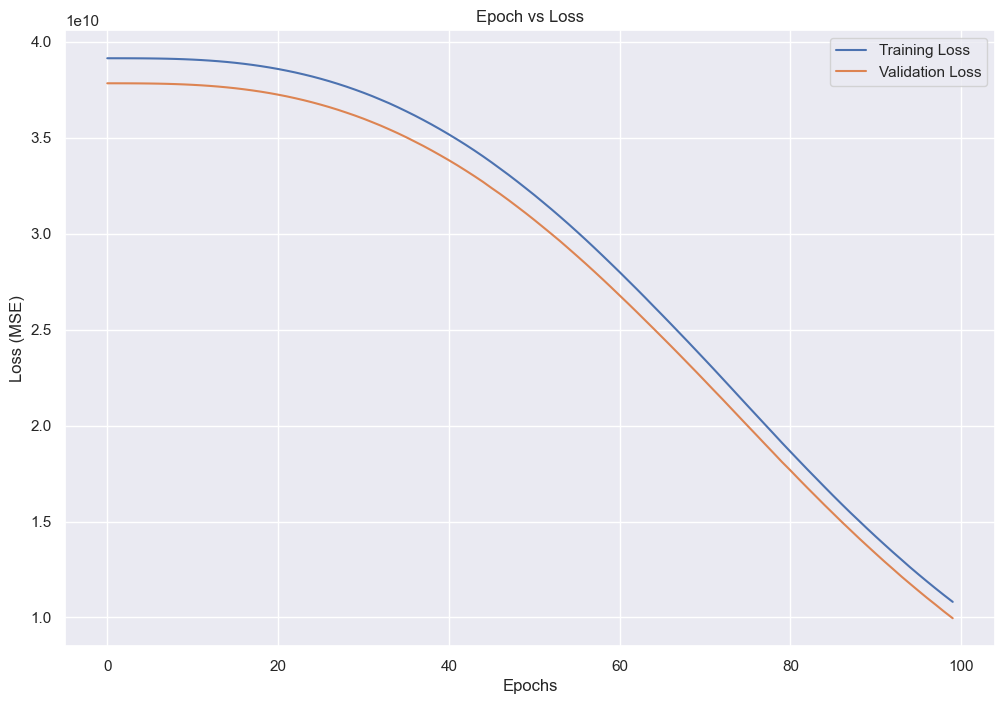

In [115]:
# Plot Loss vs Epochs
plt.plot(history.history['loss'], label='Training Loss')       # training loss curve
plt.plot(history.history['val_loss'], label='Validation Loss') # validation loss curve
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.title("Epoch vs Loss")
plt.show()

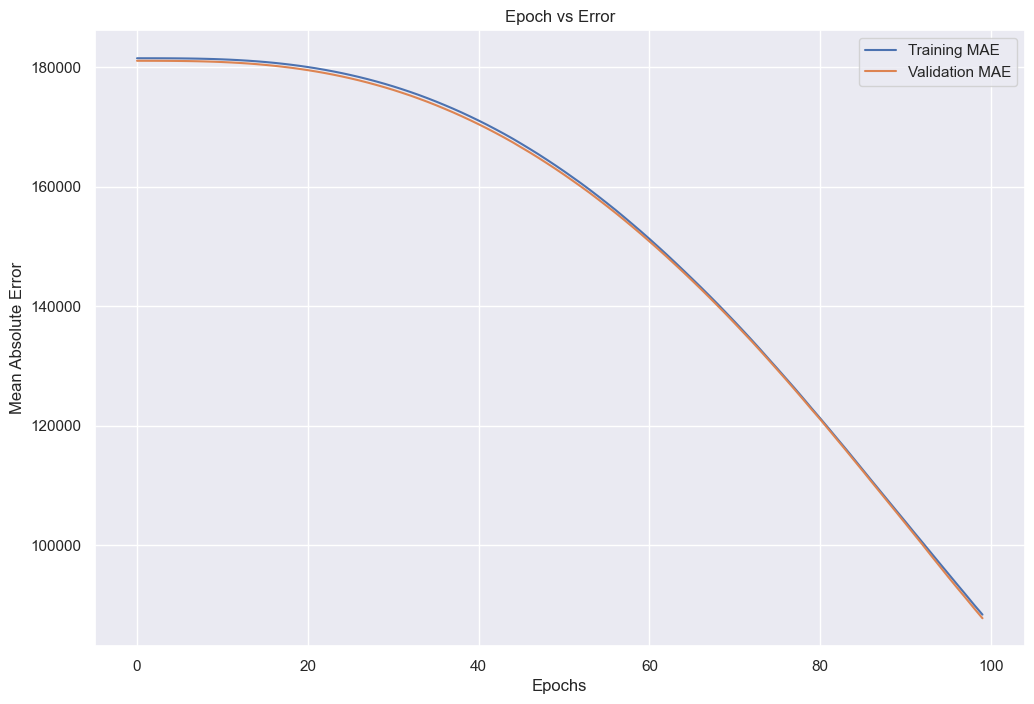

In [117]:
# Plot MAE vs Epochs
plt.plot(history.history['mae'], label='Training MAE')         # training MAE curve
plt.plot(history.history['val_mae'], label='Validation MAE')   # validation MAE curve
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.title("Epoch vs Error")
plt.show()